In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('heart.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()
data.head(10)


 	 The data frame has 918 rows and 12 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [10]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['HeartDisease'].value_counts())



print("\n \t The data has {} Heart Disease, {} Heart Disease and {} Not Heart Disease.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 918 Heart Disease, 508 Heart Disease and 410 Not Heart Disease.


<AxesSubplot:xlabel='index', ylabel='HeartDisease'>

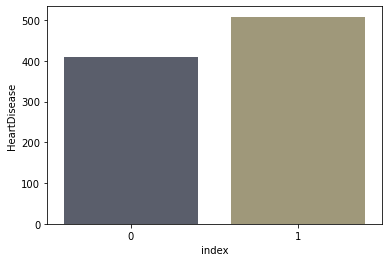

In [11]:
xx=data['HeartDisease'].value_counts().reset_index()
sns.barplot(x='index', y='HeartDisease' ,data=xx, palette='cividis')


In [12]:
features_mean= list(data.columns[:-1])

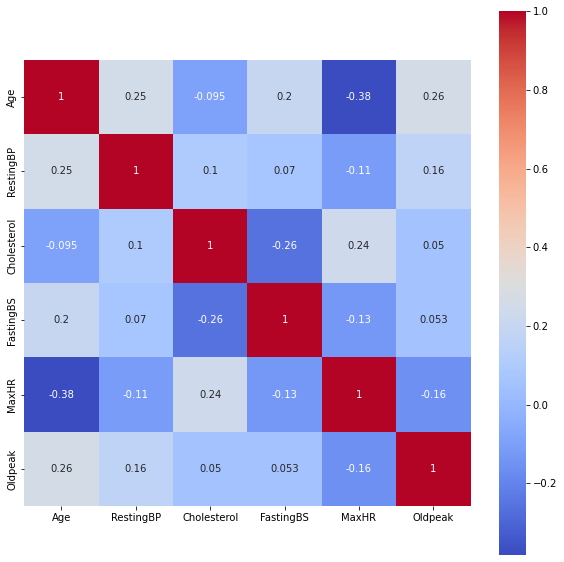

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

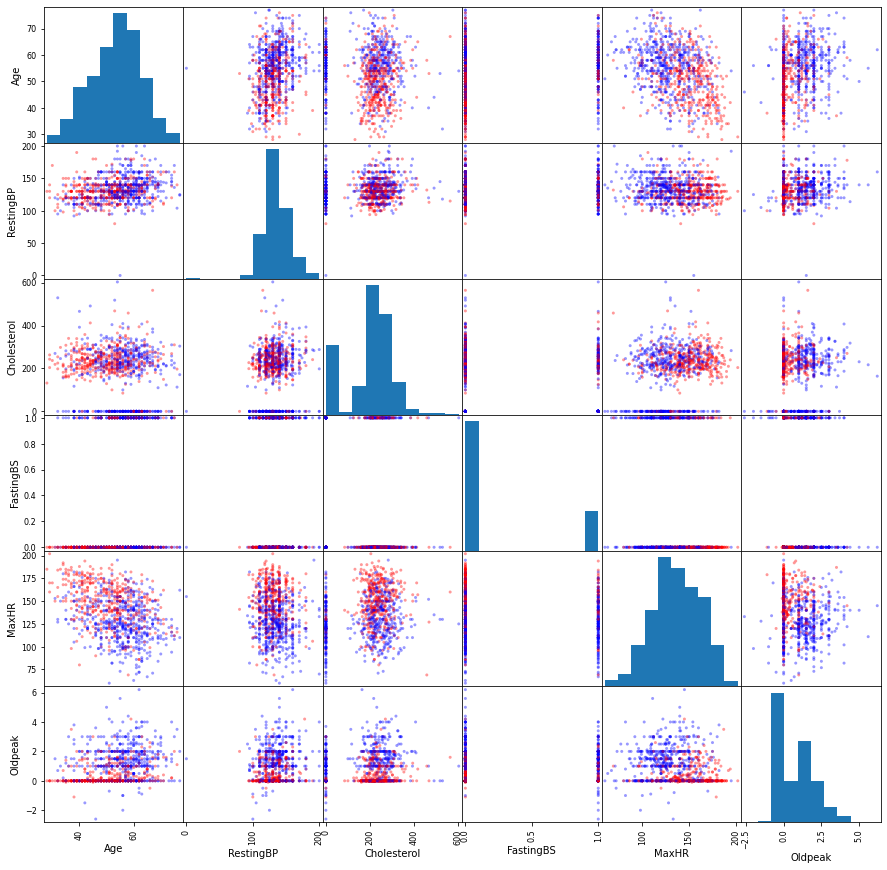

In [14]:
from pandas.plotting import scatter_matrix

color_dic = {0:'red', 1:'blue'}
colors = data['HeartDisease'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

In [15]:
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

le = LabelEncoder()
data.ChestPainType = le.fit_transform(data.ChestPainType)

le = LabelEncoder()
data.RestingECG = le.fit_transform(data.RestingECG)

le = LabelEncoder()
data.ExerciseAngina = le.fit_transform(data.ExerciseAngina)

le = LabelEncoder()
data.ST_Slope = le.fit_transform(data.ST_Slope)

In [16]:
#data.ChestPainType(0,1,2,3)
#data.RestingECG(0,1,2)
#data.ExerciseAngina(0,1)
#data.ST_Slope(1,2)

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

In [18]:
X = data.loc[:,features_mean]
y = data.loc[:, 'HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

In [19]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [20]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_train), y_train))

Accuracy: 84.24%
Cross validation score: 83.11% (+/- 10.09%)
Execution time: 0.055993 seconds 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       335
           1       0.87      0.88      0.88       399

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



In [33]:
from sklearn.ensemble import RandomForestClassifier


start = time.time()

rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
prediction = rfModel.predict(X_test)
scores = cross_val_score(rfModel, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(rfModel.predict(X_train), y_train))

Random Forest Accuracy: 89.67%
Cross validation score: 91.10% (+/- 4.17%)
Execution time: 2.4237 seconds 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [38]:
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()

etModel = ExtraTreesClassifier()
etModel.fit(X_train, y_train)
prediction = etModel.predict(X_test)
scores = cross_val_score(rtModel, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(etModel.predict(X_train), y_train))

Extra Trees Accuracy: 88.04%
Cross validation score: 93.00% (+/- 3.79%)
Execution time: 1.7367 seconds 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [35]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()

dtModel = DecisionTreeClassifier()
dtModel.fit(X_train, y_train)
prediction = dtModel.predict(X_test)
scores = cross_val_score(dtModel, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(dtModel.predict(X_train), y_train))

Dedicion Tree Accuracy: 79.35%
Cross validation score: 81.50% (+/- 5.10%)
Execution time: 0.11998 seconds 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [36]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
scores = cross_val_score(knn, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(knn.predict(X_train), y_train))

Accuracy: 70.11%
Cross validation score: 91.90% (+/- 5.19%)
Execution time: 0.18366 seconds 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       317
           1       0.83      0.80      0.81       417

    accuracy                           0.79       734
   macro avg       0.79      0.79      0.79       734
weighted avg       0.79      0.79      0.79       734



In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))
# From the output we can see that the mean absolute error (MAE) was 0.2746.
# That is, the average absolute error between the model prediction and the actual observed data is 0.2746.

0.274694266358407

In [31]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))
#From the output we can see that the root mean squared error (RMSE) was 0.35.


0.352183836543809

In [32]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.032)


In [39]:
# predict probabilities
pred_prob1 = rfModel.predict_proba(X_test)
pred_prob2 = etModel.predict_proba(X_test)
pred_prob3 = dtModel.predict_proba(X_test)
pred_prob4 = knn.predict_proba(X_test)

In [40]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

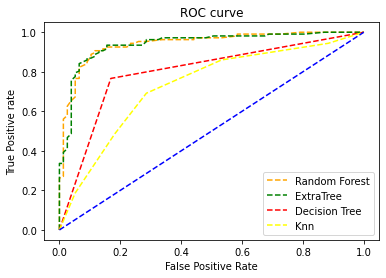

In [41]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='ExtraTree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr4, tpr4, linestyle='--',color='Yellow', label='Knn')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();